<a href="https://colab.research.google.com/github/Indranil3001/Indranil3001/blob/Data-Visualization/Data_Viz_final_GH1026152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Visualisation Project**

For this project I am using dataset from Kaggle which features players statistics from the 2024-2025 season across the top five European leagues, sourced from FBref. According to FIFA ratings, the top 3 leagues in order are, English Premiere league(England), Serie A (Italy) and Bundesliga(Germany). I will be analysing and visualising data for these three leagues.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hubertsidorowicz/football-players-stats-2024-2025")
path= path+"/players_data_light-2024_2025.csv"
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hubertsidorowicz/football-players-stats-2024-2025/versions/26/players_data_light-2024_2025.csv


In [ ]:
df=pd.read_csv(path)

df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Columns: 165 entries, Rk to AvgDist
dtypes: float64(61), int64(99), object(5)
memory usage: 3.5+ MB


(2752, 165)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,G+A-PK,xG+xAG,PrgC,PrgP,PrgR,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,1,8,3,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,51,12,2,0,0,2,10,0,0,0,0,50,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,2,2.09,2,0,0,0,0,0,0,0.00,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,MF,Valencia,es La Liga,25.0,2000.0,1,0,31,0.3,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0,2,3,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,14,18,77.8,222,48,0,0.0,0.0,0.0,0,1,0,0,2,14,4,0,0,0,2,4,0,0,0,0,14,1,1,0,1,0,1,100.0,0,1,0,1,0,1,0,0,0,0.00,0,0,0,0,0,0,0,0.00,24,0,4,4,16,0,24,2,1,50.0,0,0.0,10,28,10,0,0,0,1,1,11,3,0,0,0,0,0,0,2,0,1,0,0,0,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.00,0.10,3,2,3,1,0,0.0,1.38,0.00,0.00,NaN,24.5,0,0,0,0.1,0.1,0.07,-0.1,-0.1,17,29,58.6,268,110,0,0.0,0.0,0.0,0,0,0,0,2,21,8,0,0,0,1,8,0,0,0,0,17,3,2,2,1,0,3,100.0,0,1,0,1,1,4,0,0,0,0.00,0,0,0,0,0,0,0,0.00,36,1,8,19,9,1,36,1,1,100.0,0,0.0,13,101,67,3,2,1,0,2,16,3,1,0,0,2,0,1,1,1,2,0,0,0,2,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,21.0,2004.0,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.00,0.06,3,4,1,1,0,0.0,1.02,0.00,0.00,NaN,15.0,0,0,0,0.1,0.1,0.06,-0.1,-0.1,36,46,78.3,614,206,0,0.0,0.0,0.0,0,2,0,0,4,45,1,1,0,0,0,0,0,0,0,0,36,4,2,4,0,0,3,66.7,1,2,1,1,1,5,3,0,1,1.02,1,0,0,0,0,0,0,0.00,65,8,37,22,7,2,65,0,0,NaN,0,NaN,29,219,165,3,1,1,1,3,34,1,1,0,0,4,3,0,0,1,2,0,0,0,7,2,2,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,1,0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,2,2,100.0,41,0,0,0.0,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,1,100.0,0,0,0,0,0,1,0,0,0,0.00,0,0,0,0,0,0,0,0.00,4,0,3,1,0,0,4,0,0,NaN,0,NaN,1,10,9,1,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Yunis Abdelhamid,ma MAR,DF,

# **Filtering Data by Matches played > 15 and Minutes played > 1000**
To remove the fringe players and players who have not played much due to injuries or form, I am filtering data and excluding players who have played matches less than 15 and have less than 1000 minutes played this season.

In [ ]:
#filtering by matches played
df_mp15 = df[df['MP'] >= 15]
#filtering by minutes played
df_min_1000 = df_mp15[df['Min'] >= 1000]
#df_min_1000.head(50)
#sorted_df = df_min_1000.sort_values(by='Min', ascending=False)
#sorted_df.head(15)

<ipython-input-68-d232c4a0793a>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
df_min_1000.shape

(1166, 165)

# **Important Metrics**
For this analysis, I am reducing the number of rows from 165. I am only including data that is necessary for my visualisation. While also adding necessary columns like goal involvment per 90mins, etc.

According to FIFA ratings, the top 3 leagues in order are, English Premiere league(England), Serie A (Italy) and Bundesliga(Germany). I will be analysing and visualising data for these three leagues.



In [ ]:
#Important metrics
imp_stats= ["Player","Nation","Pos","Squad","Comp","Age","MP","Starts","Min","90s","Gls","Ast","G+A","xG","xAG","npxG","G-PK","Tkl","TklW","Blocks_stats_defense","Int","Tkl+Int","Clr","Err","PrgP","PrgC","KP","Cmp%","xA","PPA","GA","Saves","Save%","CS","CS%","PKA","PKsv","Touches","Carries","PrgR","Mis","Dis","CrdY","CrdR","PKwon","PKcon","Recov"]
df_min1000_imp = df_min_1000[imp_stats]

# Selecting Premier League, Serie A and Bundesliga
leagues = ['eng Premier League', 'it Serie A', 'de Bundesliga']


df_leagues = df_min1000_imp[df['Comp'].isin(leagues)]

#Adding a column names Goal_conribution90 to find the goal involvenment per 90 minutes played by each player
df_leagues['goal_contibutions90'] = (df_leagues['G+A'] / df_leagues['90s'].replace(0, 1)).round(2)

#Segregating Attackers, Midfielders, Defenders and goalkeepers in different dataframes, for position related visualisation
Attack = ['FW','MF']
Midfield= ['MF']
Defence = ['DF']
Goalkeeper= ['GK']
df_att = df_leagues[df['Pos'].isin(Attack)]
df_mid = df_leagues[df['Pos'].isin(Midfield)]
df_def = df_leagues[df['Pos'].isin(Defence)]
df_gk = df_leagues[df['Pos'].isin(Goalkeeper)]





<ipython-input-70-4338eb179a43>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-70-4338eb179a43>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-4338eb179a43>:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-70-4338eb179a43>:20: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-70-4338eb179a43>:21: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-70-4338eb179a43>:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# **Data Visualization**

Question 1:Which league has the most players who have played more than 15 matches or 1000 minutes?

Answer:

This Bar graph shows that English Premiere league has the most number of players, while Bundesliga has the least number of players.
Although the average number of players per team remains the same across the leagues when we see the total number of teams in each league.


Note:I have set Colors for each league.

English Premiere league: Blue

Serie A: Red

Bundesliga: Grey

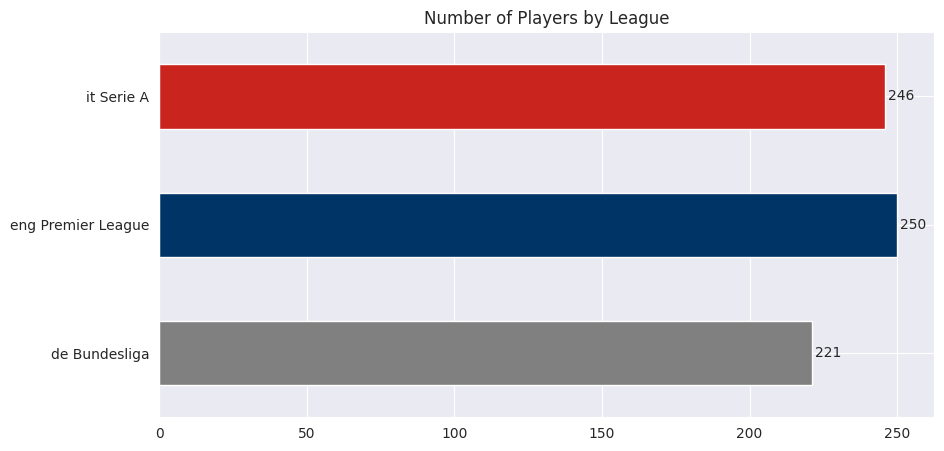

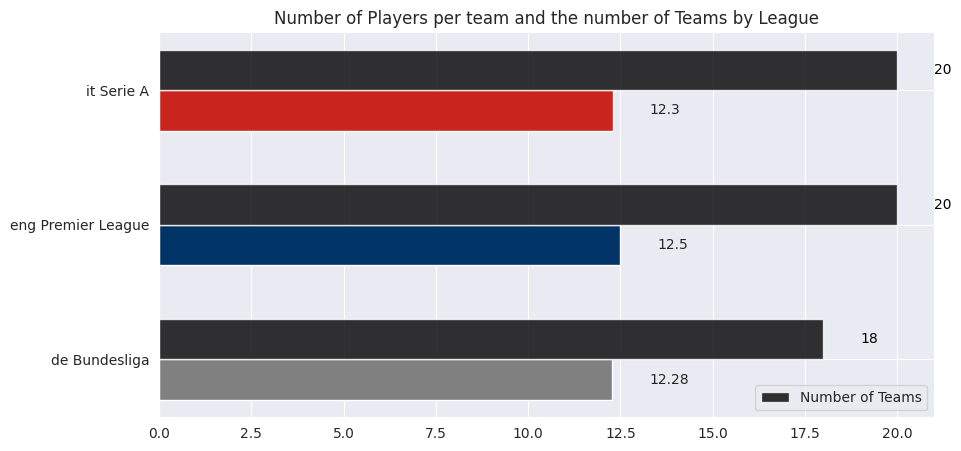

In [ ]:
#Assigning color to each league
colors = {"eng Premier League": "#003366",
          "it Serie A":"#ca241e",
          "de Bundesliga":"grey"}
# Calculating the number of players in each league
league_counts = df_leagues.groupby("Comp").size()
# Calculating the no. of teams in each league
team_counts = df_leagues.groupby("Comp")["Squad"].nunique()
#Calculating the average number of players in each team
average_players_per_team = (league_counts / team_counts).round(2)
# Get league colors
league_colors_list = [colors[league] for league in league_counts.index]

ax= league_counts.plot(kind="barh", color=league_colors_list, figsize=(10, 5))

for index, value in enumerate(league_counts):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)
ax.set_xlabel("")
ax.set_ylabel("")
plt.title("Number of Players by League")

#For grouped bar graph
# Set figure and axis
fig, ax = plt.subplots(figsize=(10, 5))


y_pos = range(len(average_players_per_team))

# Plot number of players per league
ax.barh(y_pos,average_players_per_team, height=0.3, color=league_colors_list)

# Plot number of teams per league
ax.barh([pos + 0.3 for pos in y_pos], team_counts, height=0.3, color="black", label="Number of Teams", alpha=0.8)

# Add text labels
for index, value in enumerate(average_players_per_team):
    ax.text(value + 1, index, str(value), va='center', fontsize=10)

for index, value in enumerate(team_counts):
    ax.text(value + 1, index + 0.3, str(value), va='center', fontsize=10, color="black")

# Labels and title
ax.set_yticks([pos + 0.3/2 for pos in y_pos])
ax.set_yticklabels(league_counts.index)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Number of Players per team and the number of Teams by League")

# Legend
ax.legend()

# Show plot
plt.show()

Question 2: What is the age distribution of players?

Answer:

From this Histogram, we can see that most of the players are between the ages of 23 and 28, while most players are around the age of 27.5.

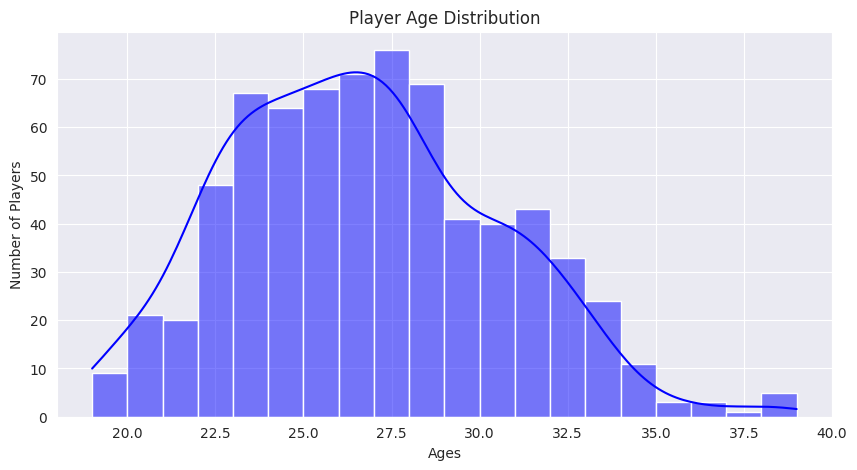

In [ ]:
sns.set_style("darkgrid")
# Visualization of player age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_leagues["Age"], bins=20, kde=True, color="blue")

plt.title("Player Age Distribution")
plt.xlabel("Ages")
plt.ylabel("Number of Players")
plt.show()

Question 3: Which league has the most number of young players?

Answer:

This graph clearly shows that English Premiere League has the most number of young players(14), playing more than 15 matches or more than 1000 minutes played. While Bundesliga and Serie A has 8 players each.

Note:Bunsedliga has 18 teams in total and Serie A has 20 teams.

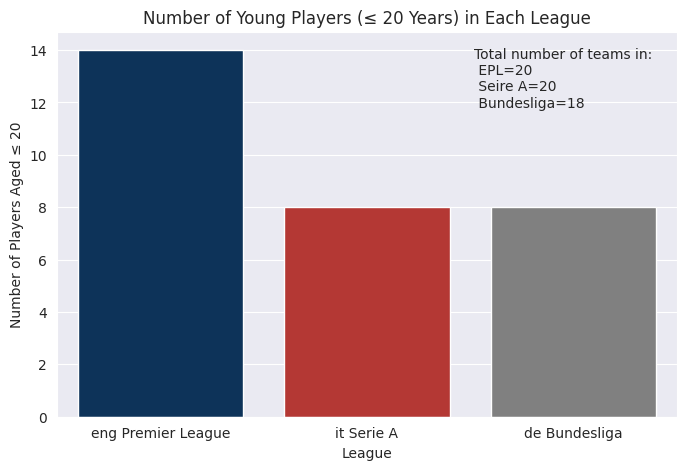

In [ ]:
#Filtering players aged <= 20
young_players = df_leagues[(df_leagues["Age"]<=20) & (df_leagues["Comp"].isin(leagues))]

young_players_count = young_players["Comp"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=young_players_count.index, y=young_players_count.values, palette=colors, hue=young_players_count.index, legend= False)

# Labels and title
plt.xlabel("League")
plt.ylabel("Number of Players Aged ≤ 20")
plt.title("Number of Young Players (≤ 20 Years) in Each League")

#Text Box
text = f"Total number of teams in:\n EPL=20 \n Seire A=20 \n Bundesliga=18"
plt.text(0.45,0.8, text, transform=ax.transAxes, fontsize=10)

# Show plot
plt.show()

Question 3: Who are the top 5 players in each league with the most Goal Contributions? (Goal Conributions is the combined total of Goals and Assists that a have.)

Answer: Mohamed Salah(EPL), Harry Kane(Bundesliga) and Mateo Retegui (Serie A) are the top contributers in their respective leagues while Mohamed Salah is the best player in these metrics, across the three leagues. It is also worth noting that Premiere League players are performing much better that the other leagues this season.


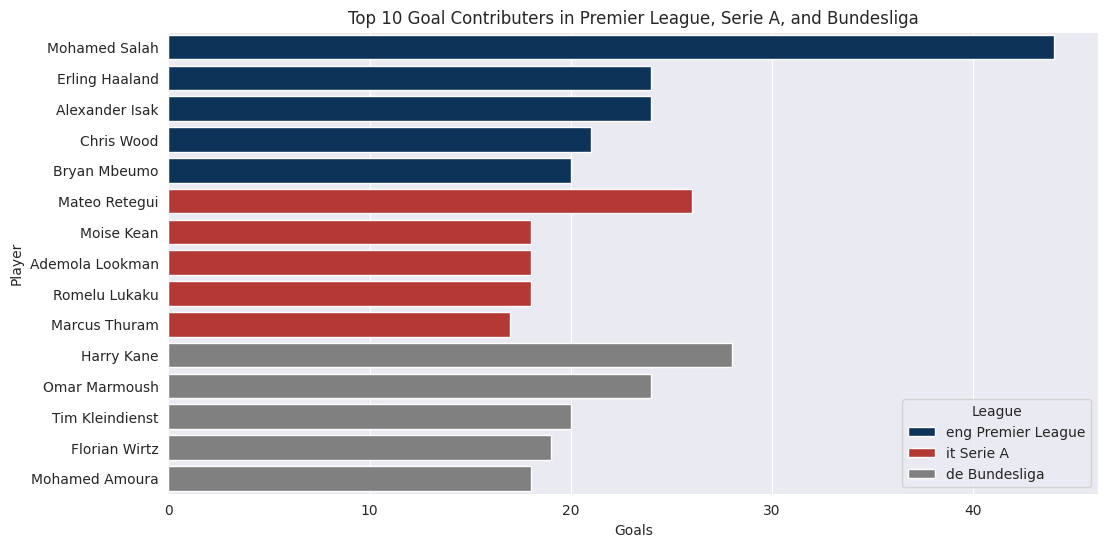

In [ ]:
# Filter top 10 goal scorers from each league
top_contributers = pd.concat([
    df[df["Comp"] == league].nlargest(5, "G+A")[["Player", "G+A", "Comp"]]
    for league in ["eng Premier League", "it Serie A", "de Bundesliga"]
])

# Plot in a single graph
plt.figure(figsize=(12, 6))
sns.barplot(y=top_contributers["Player"], x=top_contributers["G+A"], hue=top_contributers["Comp"], palette=colors)

# Labels and title
plt.xlabel("Goals")
plt.ylabel("Player")
plt.title("Top 10 Goal Contributers in Premier League, Serie A, and Bundesliga")
plt.legend(title="League")

# Show the plot
plt.show()

Question 4: How Good has Mohamed Salah been this season?

Answer:
This scatter plot between Goals scored and Assists shows that Mohamed Salah has outperformed his counterparts by a huge margin with 27 Goals and 17 Assists. While, Omar Marmoush has also been clinical with 15 Goals and 9 Assists in just 17 matches played.

In [ ]:
import plotly.express as px

fig = px.scatter(df_att, x="Gls", y="Ast",
                 color_discrete_map= colors,
                 color ="Comp",
                 hover_data=['Player','Gls', 'Ast', 'Comp','MP'],
                 labels={"Players":"Player Name",
             "Gls":"Goals",
             "Ast":"Assists",
             "G+A":"Goal Contributions",
             "Comp":"League",
             "MP": "Matches Played"})


fig.update_layout(title="Goals vs. Assists Comparison Across Leagues",
                  xaxis_title="Goals Scored",
                  yaxis_title="Assists",
                  plot_bgcolor='white',width=1000, height=600)
fig.update_xaxes(gridcolor='darkgray',showline=True,linecolor='black')
fig.update_yaxes(gridcolor='darkgray',showline=True,linecolor='black')
fig.show()

Questio 5: Who has been the most effective player with respect to goal involvements, this season?

Answer: In this graph, I have tried to show, the most effective player in 90 minutes played in the top three leagues of europe. It shows that Mohamed Salah is still the most effective player but now the difference between him and Omar Marmoush is not that drastic in terms of goal contribution, with Salah having 1.54 goal involvement per 90 minutes and Marmoush at 1.49.   

In [ ]:
import plotly.express as px

# Filter top 5 goal scorers from each league
top_contributers = pd.concat([df_att[df["Comp"] == league].nlargest(5, "goal_contibutions90")[["Player", "G+A", "Gls","Ast","Comp","goal_contibutions90"]]
    for league in ["eng Premier League", "it Serie A", "de Bundesliga"]])
fig = px.bar(top_contributers,
             x="Player",
             y="goal_contibutions90",
             hover_name="Player",
             hover_data={"G+A":True, "Gls":True, "Ast":True,"goal_contibutions90":False,"Player":False,"Comp":False},
             text_auto=True,
             title="Top 5 Goal Contributers per 90 minutes in Premier League, Serie A, and Bundesliga",
             color="Comp",
             color_discrete_map=colors,
             labels={"Players":"Player Name",
             "Gls":"Goals",
             "Ast":"Assists",
             "G+A":"Goal Contributions",
             "Comp":"Leagues"})
fig.update_traces(textposition="inside", cliponaxis=False)
fig.update_layout(xaxis={'categoryorder':'total descending'},
                         xaxis_title="",
                         yaxis_title="",width=1000, height=500)
fig.show()

<ipython-input-76-1292db81b011>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-76-1292db81b011>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-76-1292db81b011>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Question 6: Which league is better at defense?

Answer: For this visualisation, I used the three most important defensive statistics(Interception, Tackles and Blocks) of each player in the three leagues and calulated its average. It was clear from this heatmap that Premier league(England) is the best league in this metrics. The tackle stats also shows that Premiere league is the most agressive league of the three.   

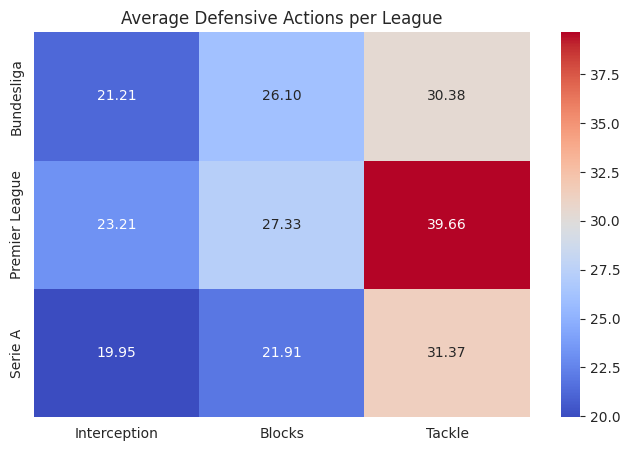

In [ ]:
# Selecting defensive stats
defensive_stats = df_def.groupby("Comp")[["Int", "Blocks_stats_defense", "Tkl"]].mean()
def_stat_renamed = defensive_stats.rename(columns={"Int":"Interception","Blocks_stats_defense":"Blocks","Tkl":"Tackle"},
                                          index={"de Bundesliga":"Bundesliga","it Serie A":"Serie A","eng Premier League":"Premier League"})
# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(def_stat_renamed, annot=True, cmap="coolwarm", fmt=".2f",xticklabels=True, yticklabels=True)

# Labels and title
plt.xlabel("")
plt.ylabel("")
plt.title("Average Defensive Actions per League")

plt.show()

Question 7: Recently, A manager of Tottenham, Ange Postecoglou has claimed that assists are "the most useless statistic". It was an interesting take so I wanted to find the relation between assists and expected assists.

Answer: Assist is a contribution leading to the scoring of a goal. While, expected assist quantifies the quality of a pass leading up to a scoring chance. For this visualisation I have only taken midfielders who have assists more than 2. This line graph helps us understand the corelation between aassist and expected assists and it is evident that there is a positive relation in most of the cases. Even tough we need more proof to disagree with his claim, but there is an opposing statistic present here.   

In [ ]:
df_mid_2=df_mid[(df_mid["Ast"]>=3)].rename(columns={"Ast":"Assists","xA":"Expected Assists"})

fig= px.line(df_mid_2,x="Player", y=['Assists','Expected Assists'],
             markers= True,
             hover_name="Player",
             hover_data={"variable":False, "Player":False},
             labels={"variable":""})

fig.update_xaxes(showticklabels=False)

fig.update_layout(xaxis_title="",
                  yaxis_title="",
                  title="Assists vs Expected Assists",
                  width=1200,
                  height=500)
fig.show()



Indranil
GH1026152